In [17]:
# linear regression by gradient descent

import numpy as np

data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
print(data_x)
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)

[[ 1.        ]
 [ 1.09090909]
 [ 1.18181818]
 [ 1.27272727]
 [ 1.36363636]
 [ 1.45454545]
 [ 1.54545455]
 [ 1.63636364]
 [ 1.72727273]
 [ 1.81818182]
 [ 1.90909091]
 [ 2.        ]
 [ 2.09090909]
 [ 2.18181818]
 [ 2.27272727]
 [ 2.36363636]
 [ 2.45454545]
 [ 2.54545455]
 [ 2.63636364]
 [ 2.72727273]
 [ 2.81818182]
 [ 2.90909091]
 [ 3.        ]
 [ 3.09090909]
 [ 3.18181818]
 [ 3.27272727]
 [ 3.36363636]
 [ 3.45454545]
 [ 3.54545455]
 [ 3.63636364]
 [ 3.72727273]
 [ 3.81818182]
 [ 3.90909091]
 [ 4.        ]
 [ 4.09090909]
 [ 4.18181818]
 [ 4.27272727]
 [ 4.36363636]
 [ 4.45454545]
 [ 4.54545455]
 [ 4.63636364]
 [ 4.72727273]
 [ 4.81818182]
 [ 4.90909091]
 [ 5.        ]
 [ 5.09090909]
 [ 5.18181818]
 [ 5.27272727]
 [ 5.36363636]
 [ 5.45454545]
 [ 5.54545455]
 [ 5.63636364]
 [ 5.72727273]
 [ 5.81818182]
 [ 5.90909091]
 [ 6.        ]
 [ 6.09090909]
 [ 6.18181818]
 [ 6.27272727]
 [ 6.36363636]
 [ 6.45454545]
 [ 6.54545455]
 [ 6.63636364]
 [ 6.72727273]
 [ 6.81818182]
 [ 6.90909091]
 [ 7.     

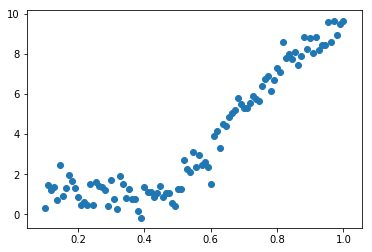

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(data_x, data_y)
plt.show()

In [19]:
data_x_new = np.hstack((np.ones_like(data_x), data_x))
data_x_new

array([[1.        , 0.1       ],
       [1.        , 0.10909091],
       [1.        , 0.11818182],
       [1.        , 0.12727273],
       [1.        , 0.13636364],
       [1.        , 0.14545455],
       [1.        , 0.15454545],
       [1.        , 0.16363636],
       [1.        , 0.17272727],
       [1.        , 0.18181818],
       [1.        , 0.19090909],
       [1.        , 0.2       ],
       [1.        , 0.20909091],
       [1.        , 0.21818182],
       [1.        , 0.22727273],
       [1.        , 0.23636364],
       [1.        , 0.24545455],
       [1.        , 0.25454545],
       [1.        , 0.26363636],
       [1.        , 0.27272727],
       [1.        , 0.28181818],
       [1.        , 0.29090909],
       [1.        , 0.3       ],
       [1.        , 0.30909091],
       [1.        , 0.31818182],
       [1.        , 0.32727273],
       [1.        , 0.33636364],
       [1.        , 0.34545455],
       [1.        , 0.35454545],
       [1.        , 0.36363636],
       [1.

In [20]:
order = np.random.permutation(len(data_x_new))
order

array([ 8, 62, 84, 36, 34, 51, 90, 33, 75, 76,  6,  3, 81, 43, 89, 54, 50,
       73, 74, 26, 41, 19, 64,  9, 13, 31,  7, 63, 94,  1, 77, 92, 21, 14,
       45, 79, 27, 30, 69, 24, 29, 95, 60, 44, 40,  2, 91, 72, 11, 49, 32,
       96, 56, 25, 99, 66, 16, 57, 87, 37, 17, 71, 78, 18, 70, 28, 35,  4,
       58, 67, 65, 12, 80, 15, 55, 83, 61, 86, 88,  0, 39, 53, 52, 59, 47,
       20, 93, 98, 82, 42, 46, 23, 68, 38, 10, 48, 97, 22, 85,  5])

In [21]:
portion = 20
test_x = data_x_new[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x_new[order[portion:]]
train_y = data_y[order[portion:]]

test_x

array([[1.        , 0.17272727],
       [1.        , 0.66363636],
       [1.        , 0.86363636],
       [1.        , 0.42727273],
       [1.        , 0.40909091],
       [1.        , 0.56363636],
       [1.        , 0.91818182],
       [1.        , 0.4       ],
       [1.        , 0.78181818],
       [1.        , 0.79090909],
       [1.        , 0.15454545],
       [1.        , 0.12727273],
       [1.        , 0.83636364],
       [1.        , 0.49090909],
       [1.        , 0.90909091],
       [1.        , 0.59090909],
       [1.        , 0.55454545],
       [1.        , 0.76363636],
       [1.        , 0.77272727],
       [1.        , 0.33636364]])

In [22]:
def get_gradient(w,x,y):
    y_estimate = x.dot(w).flatten()
    error = y.flatten() - y_estimate
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, np.linalg.norm(error)

In [23]:
w = np.random.randn(2)
alpha = 0.5
tolerance = 1e-5

# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print("Converged.")
        break
    
    # Print error every 50 iterations
    if iterations % 100 == 0:
#         print(error)
        print("Iteration: %d - Error: %.4f" %(iterations, error))
    
    iterations += 1
    w = new_w

Iteration: 100 - Error: 10.9878
Iteration: 200 - Error: 10.9045
Iteration: 300 - Error: 10.9041
Converged.


(100, 1)
100


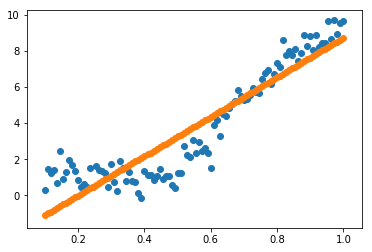

In [25]:
y_estimate = data_x_new.dot(w).flatten()
plt.scatter(data_x, data_y)
plt.scatter(data_x, y_estimate)
plt.show()